# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import csv

In [2]:
from jupyterthemes import jtplot
jtplot.style()

## Get Training Data

In [3]:
dfx = pd.read_csv("Training Data/Linear_X_Train.csv")
dfy = pd.read_csv("Training Data/Linear_Y_Train.csv")

x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


In [4]:
# print(dfy)

In [5]:
y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

## Visualise

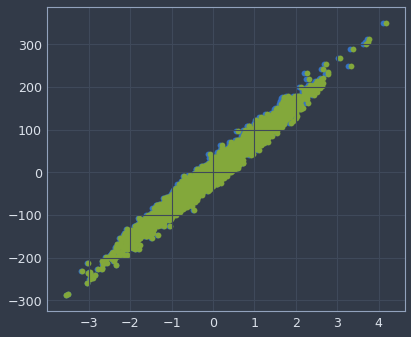

In [6]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

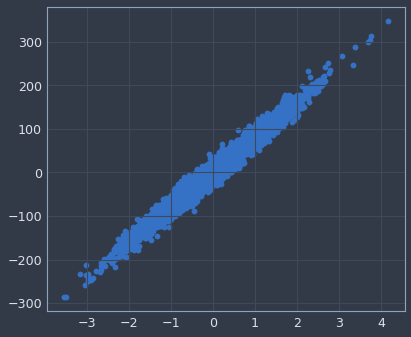

In [7]:
plt.scatter(X,Y)
plt.show()

In [8]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [9]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    return error

In [10]:
def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] += 2*(hx-Y[i])
        grad[1] += 2*(hx-Y[i])*X[i]
    return grad

In [11]:
def gradientDescent(X,Y,learning_rate=0.0001):
    theta = np.zeros((2,))
    
    itr = 0
    max_itr=50
    
    err_list = []
    
    while(itr<=max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        err_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
    
    return theta,err_list

In [12]:
final_theta, error_list = gradientDescent(x,y)

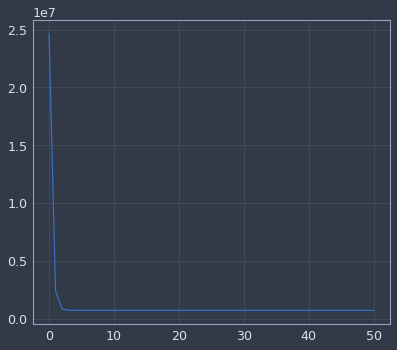

In [13]:
plt.plot(error_list)
plt.show()

In [14]:
print(final_theta)

[ 3.72798828 80.54363185]


### Plot the line for testing data

In [15]:
xtest = pd.read_csv("Test Cases/Linear_X_Test.csv")

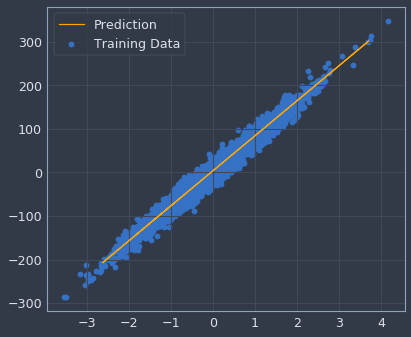

In [16]:
plt.scatter(X,Y,label="Training Data")
plt.plot(xtest,hypothesis(xtest,final_theta),color="orange",label="Prediction")
plt.legend()
plt.show()

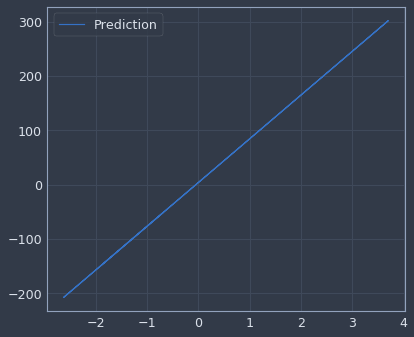

In [17]:
plt.plot(xtest,hypothesis(xtest,final_theta),label="Prediction")
plt.legend()
plt.show()

In [18]:
dfx.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [19]:
dfy.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [20]:
yans = hypothesis(xtest,final_theta)

In [21]:
yans.head()

,x
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [22]:
yans.columns = ['score']

In [23]:
yans.head()

,score
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [24]:
df_concat = pd.concat([xtest,yans], axis=1)

In [25]:
df_concat.columns = ['time','score']

In [26]:
df_concat.head()

,time,score
0,-1.877944,-147.528475
1,-0.869032,-66.266998
2,-2.530182,-200.062093
3,2.760205,226.044960
4,0.591000,51.329285


In [27]:
# df_concat.to_csv("submission.csv", sep='\t')

In [28]:
yans.head()

,score
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [29]:
print(yans.shape[0])
print(xtest.shape[0])

1250
1250


In [30]:
print(xtest.values[0])

[-1.87794441]


In [31]:
with open('Sample_Submission.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    m = yans.shape[0]
    writer.writerow(["y"])
    for i in range(m):
        l = yans.values[i]
        writer.writerow(l)
    csvFile.close()

In [32]:
ans = pd.read_csv("Sample_Submission.csv")

In [33]:
print(ans)

               y
0    -147.528475
1     -66.266998
2    -200.062093
3     226.044960
4      51.329285
5    -100.624379
6     -12.125254
7      27.252959
8     -62.454159
9    -117.213618
10    -10.669528
11      9.542993
12    -36.916575
13     68.254643
14     11.652051
15     -9.450807
16     26.494476
17    107.726360
18    177.226579
19     23.095251
20    -31.079395
21     22.188860
22    -52.495101
23   -147.007525
24     69.547784
25    110.116695
26    155.291370
27     11.834716
28     34.648178
29    -91.994879
...          ...
1220  -12.766261
1221   34.362936
1222   63.750793
1223   39.835226
1224  -90.398206
1225 -101.816274
1226   63.744913
1227 -101.360047
1228   56.629543
1229  -80.200999
1230  -85.745676
1231   25.355904
1232  -97.162094
1233   -0.252791
1234  -34.840085
1235  -71.236201
1236  -36.372666
1237  -25.176892
1238   91.532399
1239   76.163973
1240   -9.624295
1241   -0.818951
1242   89.246621
1243   31.688955
1244  -72.733128
1245   -9.808053
1246   78.8125